# 第5章 株式データの取得と可視化

In [20]:
using DataFramesMeta, CSV, DataFrames, Gadfly, ShiftedArrays, Statistics, StatsBase, OnlineStats, HypothesisTests, GLM

In [2]:
# ch05_01
stock_data_df = DataFrame(CSV.File("../../data/ch05_stock_data.csv"))
first(stock_data_df, 10)

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2015,1,1,1,954,0,2422000,1.0
2,2015,2,2,1,960,0,2422000,1.0
3,2015,3,3,1,1113,0,2422000,1.0
4,2015,4,4,1,1081,0,2422000,1.0
5,2015,5,5,1,1317,0,2422000,1.0
6,2015,6,6,1,1366,29,2422000,1.0
7,2015,7,7,1,1353,0,2422000,1.0
8,2015,8,8,1,1209,0,2422000,1.0
9,2015,9,9,1,1291,0,2422000,1.0


In [3]:
#ch05_03
@chain stock_data_df begin
    @rsubset(:firm_ID == 1, :month_ID in 27:30)
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2017,3,27,1,4371,0,2422000,1.0
2,2017,4,28,1,4082,0,2906000,1.2
3,2017,5,29,1,3478,0,2906000,1.0
4,2017,6,30,1,4317,43,2906000,1.0


In [4]:
#ch05_04
@chain stock_data_df begin
    @rsubset(:firm_ID == 74, :month_ID in 29:32)
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2017,5,29,74,2816,0,4960000,1.0
2,2017,6,30,74,1402,11,9920000,2.0
3,2017,7,31,74,1420,0,9920000,1.0
4,2017,8,32,74,1502,0,9920000,1.0


In [5]:
#ch05_05
stock_data_df = @chain stock_data_df begin
    @rtransform(:ME = :stock_price * :shares_outstanding)
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2015,1,1,1,954,0,2422000,1.0
2,2015,2,2,1,960,0,2422000,1.0
3,2015,3,3,1,1113,0,2422000,1.0
4,2015,4,4,1,1081,0,2422000,1.0
5,2015,5,5,1,1317,0,2422000,1.0
6,2015,6,6,1,1366,29,2422000,1.0
7,2015,7,7,1,1353,0,2422000,1.0
8,2015,8,8,1,1209,0,2422000,1.0
9,2015,9,9,1,1291,0,2422000,1.0


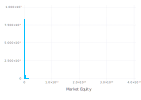

In [6]:
#ch05_06
@chain stock_data_df begin
    plot(x = :ME, Geom.histogram, Guide.xlabel("Market Equity"))
end

In [7]:
#ch05_07
stock_data_df = @chain stock_data_df begin
    @orderby(:month_ID, :firm_ID)
    groupby(:firm_ID)
    @transform(:lagged_stock_price = lag(:stock_price))
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2015,1,1,1,954,0,2422000,1.0
2,2015,1,1,2,1242,0,1564000,1.0
3,2015,1,1,3,833,0,55313000,1.0
4,2015,1,1,4,1033,0,12669000,1.0
5,2015,1,1,5,1343,0,31062000,1.0
6,2015,1,1,6,523,0,9167000,1.0
7,2015,1,1,7,961,0,10808000,1.0
8,2015,1,1,9,3094,0,988000,1.0
9,2015,1,1,10,893,0,4468000,1.0


In [8]:
#ch05_08
stock_data_df = @chain stock_data_df begin
    @rtransform(:R = ((:stock_price + :DPS) * :adjustment_coefficient) / :lagged_stock_price - 1)
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2015,1,1,1,954,0,2422000,1.0
2,2015,1,1,2,1242,0,1564000,1.0
3,2015,1,1,3,833,0,55313000,1.0
4,2015,1,1,4,1033,0,12669000,1.0
5,2015,1,1,5,1343,0,31062000,1.0
6,2015,1,1,6,523,0,9167000,1.0
7,2015,1,1,7,961,0,10808000,1.0
8,2015,1,1,9,3094,0,988000,1.0
9,2015,1,1,10,893,0,4468000,1.0


In [9]:
#ch05_09
stock_data_df = @chain stock_data_df begin
    @rtransform(:Re = :R - :R_F)
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,2015,1,1,1,954,0,2422000,1.0
2,2015,1,1,2,1242,0,1564000,1.0
3,2015,1,1,3,833,0,55313000,1.0
4,2015,1,1,4,1033,0,12669000,1.0
5,2015,1,1,5,1343,0,31062000,1.0
6,2015,1,1,6,523,0,9167000,1.0
7,2015,1,1,7,961,0,10808000,1.0
8,2015,1,1,9,3094,0,988000,1.0
9,2015,1,1,10,893,0,4468000,1.0


In [10]:
#ch05_10
describe(stock_data_df)

,variable,mean,min,median,max,nmissing
,Symbol,Float64,Real,Float64,Real,Int64
1,year,2017.54,2015,2018.0,2020,0
2,month,6.5,1,6.5,12,0
3,month_ID,37.0136,1,37.0,72,0
4,firm_ID,761.152,1,760.0,1515,0
5,stock_price,4685.3,112,2445.0,622796,0
6,DPS,6.80174,0,0.0,1913,0
7,shares_outstanding,6.9726e7,37000,1.0143e7,21111071000,0
8,adjustment_coefficient,0.99992,0.1,1.0,2.0,0
9,R_F,0.000204146,-0.000232934,8.20293e-5,0.000736771,0


In [11]:
#ch05_11
std(skipmissing(stock_data_df[!, :R]))
var(skipmissing(stock_data_df[!, :R]))

0.008304855361809874

In [12]:
#ch05_12
function myskewness(x)
    #return sum(((x - mean(x)) / std(x)) ^ 3) / length(x)
    return sum(((x .- mean(x)) ./ std(x)) .^ 3) / length(collect(x))
end
myskewness(skipmissing(stock_data_df[!, :R]))

0.5065672110667503

In [13]:
skewness(collect(skipmissing(stock_data_df[!, :R])))

0.5065753357497067

In [14]:
#ch05_13
function mykurtosis(x)
    return sum(((x .- mean(x)) ./ std(x)) .^ 4) / length(collect(x))
end
mykurtosis(skipmissing(stock_data_df[!, :R]))

4.268045013608207

In [15]:
kurtosis(collect(skipmissing(stock_data_df[!, :R])))

1.2681362857487901

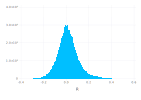

In [16]:
#ch05_14
plot(stock_data_df, x = :R, Geom.histogram)

In [17]:
#ch05_15
#annual_stock_data_df 
annual_data_df = @chain stock_data_df begin
    @orderby(:month_ID, :firm_ID)
    groupby([:firm_ID, :year])
    @combine begin
        :R = prod(1 .+ :R) .- 1
        :R_F = prod(1 .+ :R_F) .- 1
    end
end

,firm_ID,year,R,R_F
,Int64,Int64,Float64?,Float64
1,1,2015,missing,0.00743209
2,1,2016,0.997273,0.000564989
3,1,2017,0.687864,4.8848e-5
4,1,2018,-0.213613,0.00578611
5,1,2019,0.646836,-0.000769931
6,1,2020,-0.284303,0.000379944
7,2,2015,missing,0.00578611
8,2,2016,0.375229,-0.000769931
9,2,2017,0.640732,0.000379944


In [18]:
#ch05_16
@chain stock_data_df begin
    groupby([:firm_ID, :year])
    @combine(:simple_cumulative_R = sum(:R))
end

,firm_ID,year,simple_cumulative_R
,Int64,Int64,Float64?
1,1,2015,missing
2,1,2016,0.758762
3,1,2017,0.67116
4,1,2018,-0.18556
5,1,2019,0.529912
6,1,2020,-0.22872
7,2,2015,missing
8,2,2016,0.362323
9,2,2017,0.573558


In [19]:
#ch05_17
financial_data_df = DataFrame(CSV.File("../../data/ch04_output.csv"))
nrow(financial_data_df), nrow(annual_data_df), nrow(stock_data_df)

(7919, 7920, 95040)

In [20]:
#ch05_18
@chain annual_data_df begin
    outerjoin(financial_data_df, on = [:firm_ID, :year])
    first(10)
    println
end

10×16 DataFrame
 Row │ firm_ID  year   R               R_F           industry_ID  sales     OX        NFE        X         OA        FA        OL        FO        BE        lagged_BE           ROE                  
     │ Int64    Int64  Float64?        Float64?      Int64?       Float64?  Float64?  Float64?   Float64?  Float64?  Float64?  Float64?  Float64?  Float64?  String31?           String31?            
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │       1   2016        0.997273   0.000564989            1   5948.96    564.14   50.6675     513.48  13865.6    4642.16   4534.22   3959.7   10013.8   NA                  NA
   2 │       1   2017        0.687864   4.8848e-5              1   6505.06    691.18   29.5432     661.64  13952.6    7743.99   5111.22   6159.02  10426.3   10013.82            0.06607268754581169
   3 │    

In [21]:
#ch05_19
annual_data_df = @chain annual_data_df begin
    outerjoin(financial_data_df, on = [:firm_ID, :year])
end

,firm_ID,year,R,R_F,industry_ID,sales,OX,NFE
,Int64,Int64,Float64?,Float64?,Int64?,Float64?,Float64?,Float64?
1,1,2016,0.997273,0.000564989,1,5948.96,564.14,50.6675
2,1,2017,0.687864,4.8848e-5,1,6505.06,691.18,29.5432
3,1,2018,-0.213613,0.00578611,1,6846.38,751.29,86.4865
4,1,2019,0.646836,-0.000769931,1,7572.24,958.53,298.05
5,1,2020,-0.284303,0.000379944,1,7537.63,778.37,-65.4588
6,2,2015,missing,0.00578611,1,3505.75,45.82,5.75112
7,2,2016,0.375229,-0.000769931,1,3491.27,51.25,1.87654
8,2,2017,0.640732,0.000379944,1,3945.66,83.43,7.52788
9,2,2018,-0.219689,0.003708,1,4139.33,93.4,6.81663


In [22]:
#ch05_20
monthly_data_df = @chain stock_data_df begin
    outerjoin(financial_data_df, on = [:firm_ID, :year])
end

,year,month,month_ID,firm_ID,stock_price,DPS,shares_outstanding,adjustment_coefficient
,Int64,Int64?,Int64?,Int64,Int64?,Int64?,Int64?,Float64?
1,2015,1,1,2,1242,0,1564000,1.0
2,2015,1,1,3,833,0,55313000,1.0
3,2015,1,1,4,1033,0,12669000,1.0
4,2015,1,1,5,1343,0,31062000,1.0
5,2015,1,1,6,523,0,9167000,1.0
6,2015,1,1,7,961,0,10808000,1.0
7,2015,1,1,9,3094,0,988000,1.0
8,2015,1,1,10,893,0,4468000,1.0
9,2015,1,1,11,2730,0,44343000,1.0


In [23]:
#ch05_21
A_df = DataFrame(
    firm_ID = [1, 2],
    stock_price = [120, 500],
)
B_df = DataFrame(
    firm_ID = [1, 3],
    DPS = [5, 10],
)
outerjoin(A_df, B_df, on = :firm_ID)

,firm_ID,stock_price,DPS
,Int64,Int64?,Int64?
1,1,120,5
2,2,500,missing
3,3,missing,10


In [24]:
#ch05_22
innerjoin(A_df, B_df, on = :firm_ID)

,firm_ID,stock_price,DPS
,Int64,Int64,Int64
1,1,120,5


In [25]:
#ch05_23
leftjoin(A_df, B_df, on = :firm_ID)

,firm_ID,stock_price,DPS
,Int64,Int64,Int64?
1,1,120,5
2,2,500,missing


In [26]:
rightjoin(A_df, B_df, on = :firm_ID)

,firm_ID,stock_price,DPS
,Int64,Int64?,Int64
1,1,120,5
2,3,missing,10


In [27]:
#ch05_24
annual_data_df = @chain stock_data_df begin
    @rsubset(:month == 12)
    @select(:year, :firm_ID, :ME)
    outerjoin(annual_data_df, on = [:year, :firm_ID])
    @rtransform(:ME = :ME / 1e+06)
end

,year,firm_ID,ME,R,R_F,industry_ID,sales,OX
,Int64,Int64,Float64,Float64?,Float64?,Int64?,Float64?,Float64?
1,2016,1,6883.32,0.997273,0.000564989,1,5948.96,564.14
2,2017,1,11377.0,0.687864,4.8848e-5,1,6505.06,691.18
3,2018,1,8694.75,-0.213613,0.00578611,1,6846.38,751.29
4,2019,1,13957.5,0.646836,-0.000769931,1,7572.24,958.53
5,2020,1,9708.95,-0.284303,0.000379944,1,7537.63,778.37
6,2015,2,4086.73,missing,0.00578611,1,3505.75,45.82
7,2016,2,5592.86,0.375229,-0.000769931,1,3491.27,51.25
8,2017,2,9152.53,0.640732,0.000379944,1,3945.66,83.43
9,2018,2,7103.69,-0.219689,0.003708,1,4139.33,93.4


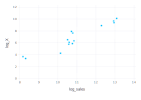

In [28]:
#ch05_25
@chain annual_data_df begin
    @rsubset(:year == 2015, :firm_ID in 2:20, :X > 0)
    @rtransform begin
        :log_sales = log(:sales)
        :log_X = log(:X)
    end
    @select(:log_sales, :log_X, :ME)
    #plot(x = :log_sales, y = :log_X, Geom.point, size = :ME)
    plot(x = :log_sales, y = :log_X, Geom.point)
end

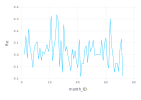

In [29]:
#ch05_26
@chain stock_data_df begin
    @rsubset(:firm_ID == 1)
    plot(x = :month_ID, y = :Re, Geom.line)
end

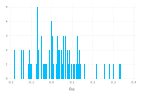

In [30]:
#ch05_27
@chain stock_data_df begin
    @rsubset(:firm_ID == 1)
    plot(x = :Re, Geom.histogram)
end

In [31]:
#ch05_28
@chain stock_data_df begin
    @rsubset(:firm_ID == 1)
    @combine(:mean_Re = mean(skipmissing(:Re)))
end

,mean_Re
,Float64
1,0.0290606


In [32]:
#ch05_29
mu0 = 0
@chain stock_data_df begin
    @rsubset(:firm_ID == 1)
    @combine begin
        :t_value = mean(skipmissing(:Re)) / sqrt(var(skipmissing(:Re)) / length(collect(skipmissing(:Re))))
    end
end

,t_value
,Float64
1,2.1213


In [33]:
#ch05_30
mask = stock_data_df[!, :firm_ID] .== 1
OneSampleTTest(collect(skipmissing(stock_data_df[mask, :Re])))

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0290606
    95% confidence interval: (0.001738, 0.05638)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0374

Details:
    number of observations:   71
    t-statistic:              2.1212958227993437
    degrees of freedom:       70
    empirical standard error: 0.013699444815717094


# 5.5 線形回帰入門

In [2]:
stock_data_df = DataFrame(CSV.File("../../data/ch05_output1.csv", missingstrings="NA"))
annual_data_df = DataFrame(CSV.File("../../data/ch05_output2.csv", missingstrings="NA"))

┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /workspaces/empirical-accounting-and-finance-in-r/.julia/packages/CSV/jFiCn/src/context.jl:266
┌ Warning: `missingstrings` keyword argument is deprecated; pass a `Vector{String}` to `missingstring` instead
└ @ CSV /workspaces/empirical-accounting-and-finance-in-r/.julia/packages/CSV/jFiCn/src/context.jl:266


,firm_ID,year,R,Re,R_F,industry_ID,sales,OX
,Int64,Int64,Float64?,Float64?,Float64,Int64?,Float64?,Float64?
1,1,2015,missing,missing,0.00743209,missing,missing,missing
2,1,2016,0.997273,0.996708,0.000564989,1,5948.96,564.14
3,1,2017,0.687864,0.687815,4.8848e-5,1,6505.06,691.18
4,1,2018,-0.213613,-0.219399,0.00578611,1,6846.38,751.29
5,1,2019,0.646836,0.647606,-0.000769931,1,7572.24,958.53
6,1,2020,-0.284303,-0.284683,0.000379944,1,7537.63,778.37
7,2,2015,missing,missing,0.00578611,1,3505.75,45.82
8,2,2016,0.375229,0.375998,-0.000769931,1,3491.27,51.25
9,2,2017,0.640732,0.640352,0.000379944,1,3945.66,83.43


In [11]:
# ch05_31
lm_sample_data_df = @chain annual_data_df begin
    @orderby(:firm_ID, :year)
    groupby(:firm_ID)
    @transform(:lagged_ME = lag(:ME))
    @rtransform(:lagged_BEME = :lagged_BE / :lagged_ME)
    @rsubset(:year == 2016, :firm_ID <= 10)
    @select(:firm_ID, :year, :Re, :lagged_BEME)
    dropmissing
end

,firm_ID,year,Re,lagged_BEME
,Int64,Int64,Float64,Float64
1,2,2016,0.375998,0.25813
2,3,2016,0.367832,1.32919
3,4,2016,-0.191304,0.846285
4,5,2016,0.204444,2.44898
5,6,2016,0.112995,1.39473
6,7,2016,-0.0519742,0.804287
7,9,2016,0.43681,3.05003
8,10,2016,0.148492,2.60811


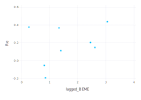

In [12]:
@chain lm_sample_data_df begin
    plot(x = :lagged_BEME, y = :Re, Geom.point)
end

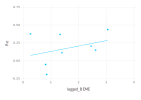

In [17]:
#ch05_32
plot(lm_sample_data_df, x = :lagged_BEME, y = :Re, Geom.point, Geom.smooth(method = :lm))

In [27]:
#ch05_33
ols = fit(LinearModel, @formula(Re ~ lagged_BEME), lm_sample_data_df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Re ~ 1 + lagged_BEME

Coefficients:
────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.0551338   0.155813   0.35    0.7356  -0.326126   0.436393
lagged_BEME  0.0755292   0.0844328  0.89    0.4055  -0.13107    0.282129
────────────────────────────────────────────────────────────────────────

In [29]:
#ch05_37
ols = fit(LinearModel, @formula(Re ~ log(lagged_BEME)), lm_sample_data_df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Re ~ 1 + :(log(lagged_BEME))

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                      Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)       0.167208    0.0868273  1.93    0.1024  -0.0452504   0.379667
log(lagged_BEME)  0.0355165   0.109113   0.33    0.7559  -0.231474    0.302507
──────────────────────────────────────────────────────────────────────────────

In [ ]:
#ch05_38